<a href="https://colab.research.google.com/github/shahabday/NLP_learning/blob/main/DSR_41_Introduction_NLP_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes go here


In [1]:
import tensorflow as tf
from tensorflow.keras import models , layers
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#!nvidia-smi


In [3]:
datasets,info = tfds.load(

          "imdb_reviews/plain_text",
          split=['train','test[:50%]','test[50%:]'], # only in tensorflow, would
                                                     #be nice to have it in numpy
          as_supervised = True,
          with_info = True
) # we have three datasets , training , test, validate

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.7YPTQV_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.7YPTQV_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.7YPTQV_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
datasets_train_original = datasets [0]
dataset_validate_original = datasets [1]
dataset_test_original = datasets [2]

In [5]:
for x,y in datasets_train_original.take(4):
  print( x.numpy().decode('utf-8') )
  print (y.numpy())

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
0
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was co

In [6]:
lengths = []
for x, _ in datasets_train_original:
  length = len(x.numpy().decode('utf-8').split())
  lengths.append(length)


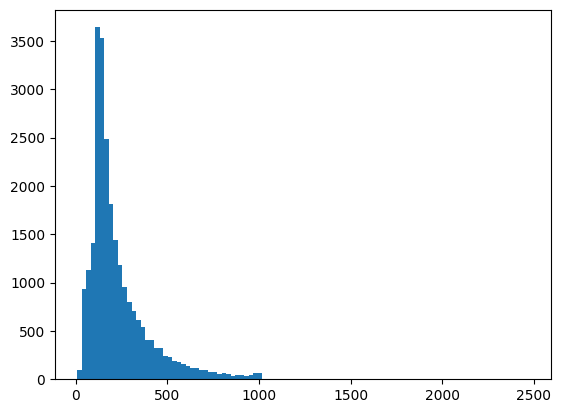

In [7]:
plt.hist(lengths, bins = 100)
plt.show()

In [8]:
shortest_sample = ' ' * 100_000
longest_sample = ''

for x,y in datasets_train_original :
  x = x.numpy().decode('utf-8')
  if len(x) < len(shortest_sample) :
    shortest_sample = x
  if len(x) > len(longest_sample) :
    longest_sample = x

print (shortest_sample)
print (longest_sample)


This movie is terrible but it has some good effects.
Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle r

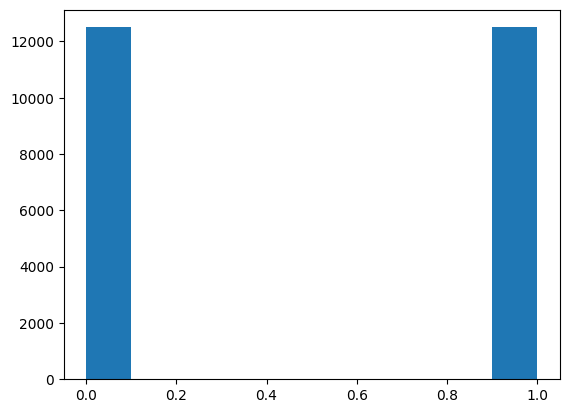

In [9]:
labels = []

for _,y in datasets_train_original :
  labels.append(y.numpy())

plt.hist(labels)
plt.show()

In [10]:
vocabulary_size = 1000

encoder = layers.TextVectorization(
    max_tokens = vocabulary_size,
    standardize = 'lower_and_strip_punctuation',
    split = "whitespace",
    output_mode= 'multi_hot'
)

encoder.adapt(datasets_train_original.map(lambda text, label : text).batch(2048))

In [11]:
encoder.get_vocabulary().index('world')

187

In [12]:
print(encoder.get_vocabulary())

['[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i', 'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be', 'one', 'its', 'at', 'all', 'by', 'an', 'they', 'from', 'who', 'so', 'like', 'her', 'just', 'or', 'about', 'has', 'if', 'out', 'some', 'there', 'what', 'good', 'when', 'more', 'very', 'even', 'she', 'my', 'no', 'up', 'would', 'which', 'only', 'time', 'really', 'story', 'their', 'were', 'had', 'see', 'can', 'me', 'than', 'we', 'much', 'well', 'been', 'get', 'will', 'into', 'also', 'because', 'other', 'do', 'people', 'bad', 'great', 'first', 'how', 'most', 'him', 'dont', 'made', 'then', 'movies', 'make', 'films', 'could', 'way', 'them', 'any', 'too', 'after', 'characters', 'think', 'watch', 'two', 'many', 'being', 'seen', 'character', 'never', 'little', 'acting', 'where', 'plot', 'best', 'love', 'did', 'know', 'life', 'show', 'does', 'ever', 'your', 'still', 'better', 'over', 'off', 'these', 'end', '

In [13]:
print(list(encoder('I am very happy to be learning at DSR. MOdSHT').numpy()))

[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [14]:
# model = models.Sequential()
# model.add(encoder)
# model.build(input_shape=(None,))
# model.summary()

# model.predict(tf.constant(['hello world because I want to']))

In [16]:
dataset_train = datasets_train_original.cache() # lift it to memory
dataset_train = dataset_train.shuffle(25000)
dataset_train = dataset_train.batch(32)

dataset_validate = dataset_test_original.cache()
dataset_validate = dataset_validate.batch(32)

dataset_test = dataset_test_original.cache()
dataset_test = dataset_test.batch(32)



In [17]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
#model.add(layers.Dense(2,activation = 'softmax'))
model.build(input_shape=(None,))
model.summary()

model.predict(tf.constant(['hello world because I want to']))
model.compile(
              optimizer = 'adam',
              loss='binary_crossentropy',
              metrics = ['accuracy']
)


print(model.evaluate(dataset_test))

history = model.fit(

          dataset_train ,
          epochs= 10 ,
          validation_data=dataset_validate

)




print(model.evaluate(dataset_test))



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ (None, 1000)                │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          16,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,033 (62.63 KB)

 Trainable params: 16,033 (62.63 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5037 - loss: 0.7450
[0.7458896040916443, 0.5036799907684326]
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7553 - loss: 0.5018 - val_accuracy: 0.8542 - val_loss: 0.3394
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8651 - loss: 0.3197 - val_accuracy: 0.8546 - val_loss: 0.3380
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8693 - loss: 0.3062 - val_accuracy: 0.8490 - val_loss: 0.3428
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8756 - loss: 0.2992 - val_accuracy: 0.8505 - val_loss: 0.3388
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8806 - loss: 0.2835 - val_accuracy: 0.8522 - val_loss: 0.3466
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8879 - loss: 0.2654 - val_accuracy: 0.8518 - val_loss: 0.3500
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9027 - los

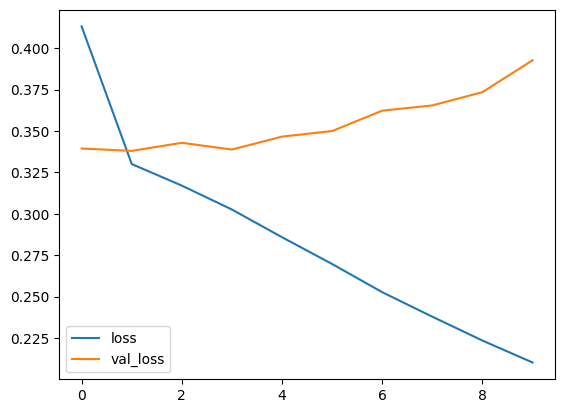

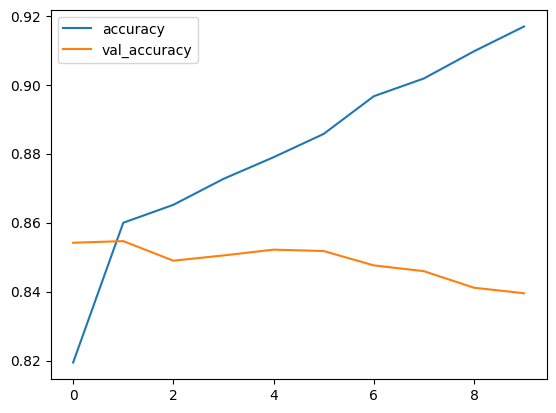

In [18]:
def render_history(history):
  plt.plot(history["loss"],label='loss')
  plt.plot(history['val_loss'], label = 'val_loss')
  plt.legend()
  plt.show()
  plt.close()

  plt.plot(history["accuracy"],label='accuracy')
  plt.plot(history['val_accuracy'], label = 'val_accuracy')
  plt.legend()

render_history(history.history)

# Word Embedding

In [20]:
vocabulary_size = 10_000
sequence_length = 128 # AKA context size

encoder = layers.TextVectorization(
                                  max_tokens = vocabulary_size,
                                  output_sequence_length  = sequence_length, # new !
                                   standardize = 'lower_and_strip_punctuation',
                                   split = 'whitespace',
                                  output_mode = 'int' # new

)

encoder.adapt(datasets_train_original.map(lambda text, label : text).batch(2048))




In [21]:
print(encoder.get_vocabulary()[:20])

['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i', 'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but']


In [39]:
encoder('Is this the real life isthis just fantasy caught in a landslide . no escape from reality. seeee , MAMA rapsody integrity complexity rare reality matrix mask offside corner steven gerrard table')

<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([   7,   11,    2,  146,  119,    1,   41,  996, 1033,    8,    4,
          1,   57, 1075,   36,  641,    1, 7154,    1, 5057, 4696, 1237,
        641, 2657, 2293,    1, 3098, 2063,    1, 2759,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])>